In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import sweetviz as sv
import pandas as pd
import numpy as np
import json
import os

# Read JSON

In [2]:
with open('raw/user_post_interaction.json') as json_file:
    data = json.load(json_file)

# Convert to pandas df

In [8]:
data = pd.DataFrame(data)
data

,user_id,reactions
0,199639326_479ce008ca8cf969,[{'post_id': 'news_editorji_1650702128029'}]
1,1186255453_6b96200b883f6581,[{'post_id': 'native_vren8feb44033d85428330529...
2,864995365_f4e8b2e35b9d7ca5,[{'post_id': 'news_chn_5808b5d60c232fb1334f645...
3,199639326_0d726104e7e8bff1,[{'post_id': 'news_dainikgomantak_2c7eda93dfc9...
4,174517858_32ed92fd5e9f3872,[{'post_id': 'videobytes_chingari_61e24f8ec9ab...
...,...,...
9995,864995365_e92cc1084d1a05f1,[{'post_id': 'instagram_CKtWX67p8fz'}]
9996,864995365_6c0516bf8ccc3bf5,[{'post_id': 'news_filmibeat_f50cbf76ef4cf1f36...
9997,1035438645_e08329519b0325cf,[{'post_id': 'youtube_CTGL8qqjL7s'}]
9998,864995365_8abe257b0eb3da4d,[{'post_id': 'news_freepressjournal_64d7eeff21...


# update the data structure of reactions from list of dict to list of dict values

In [9]:
def get_posts(
    reactions: list
) -> list:
    return [post['post_id'] for post in reactions]

In [10]:
data['reactions'] = [get_posts(reactions) for reactions in data['reactions']]
data

,user_id,reactions
0,199639326_479ce008ca8cf969,[news_editorji_1650702128029]
1,1186255453_6b96200b883f6581,[native_vren8feb44033d85428330529580bc4f2645]
2,864995365_f4e8b2e35b9d7ca5,"[news_chn_5808b5d60c232fb1334f645b5fc83fbb, tw..."
3,199639326_0d726104e7e8bff1,[news_dainikgomantak_2c7eda93dfc97fd8e776ee63c...
4,174517858_32ed92fd5e9f3872,"[videobytes_chingari_61e24f8ec9ab330a21f21b91,..."
...,...,...
9995,864995365_e92cc1084d1a05f1,[instagram_CKtWX67p8fz]
9996,864995365_6c0516bf8ccc3bf5,[news_filmibeat_f50cbf76ef4cf1f366981fbaabec65...
9997,1035438645_e08329519b0325cf,[youtube_CTGL8qqjL7s]
9998,864995365_8abe257b0eb3da4d,[news_freepressjournal_64d7eeff2197999cbe761d6...


# Explode df records on possibly multiple post reactions

In [11]:
data_expanded = data.explode('reactions')
data_expanded

,user_id,reactions
0,199639326_479ce008ca8cf969,news_editorji_1650702128029
1,1186255453_6b96200b883f6581,native_vren8feb44033d85428330529580bc4f2645
2,864995365_f4e8b2e35b9d7ca5,news_chn_5808b5d60c232fb1334f645b5fc83fbb
2,864995365_f4e8b2e35b9d7ca5,twitter_1500002374227693569
3,199639326_0d726104e7e8bff1,news_dainikgomantak_2c7eda93dfc97fd8e776ee63c8...
...,...,...
9996,864995365_6c0516bf8ccc3bf5,news_filmibeat_f50cbf76ef4cf1f366981fbaabec65af
9996,864995365_6c0516bf8ccc3bf5,twitter_1363850965829386241
9997,1035438645_e08329519b0325cf,youtube_CTGL8qqjL7s
9998,864995365_8abe257b0eb3da4d,news_freepressjournal_64d7eeff2197999cbe761d6e...


# observe the values in data_expanded df

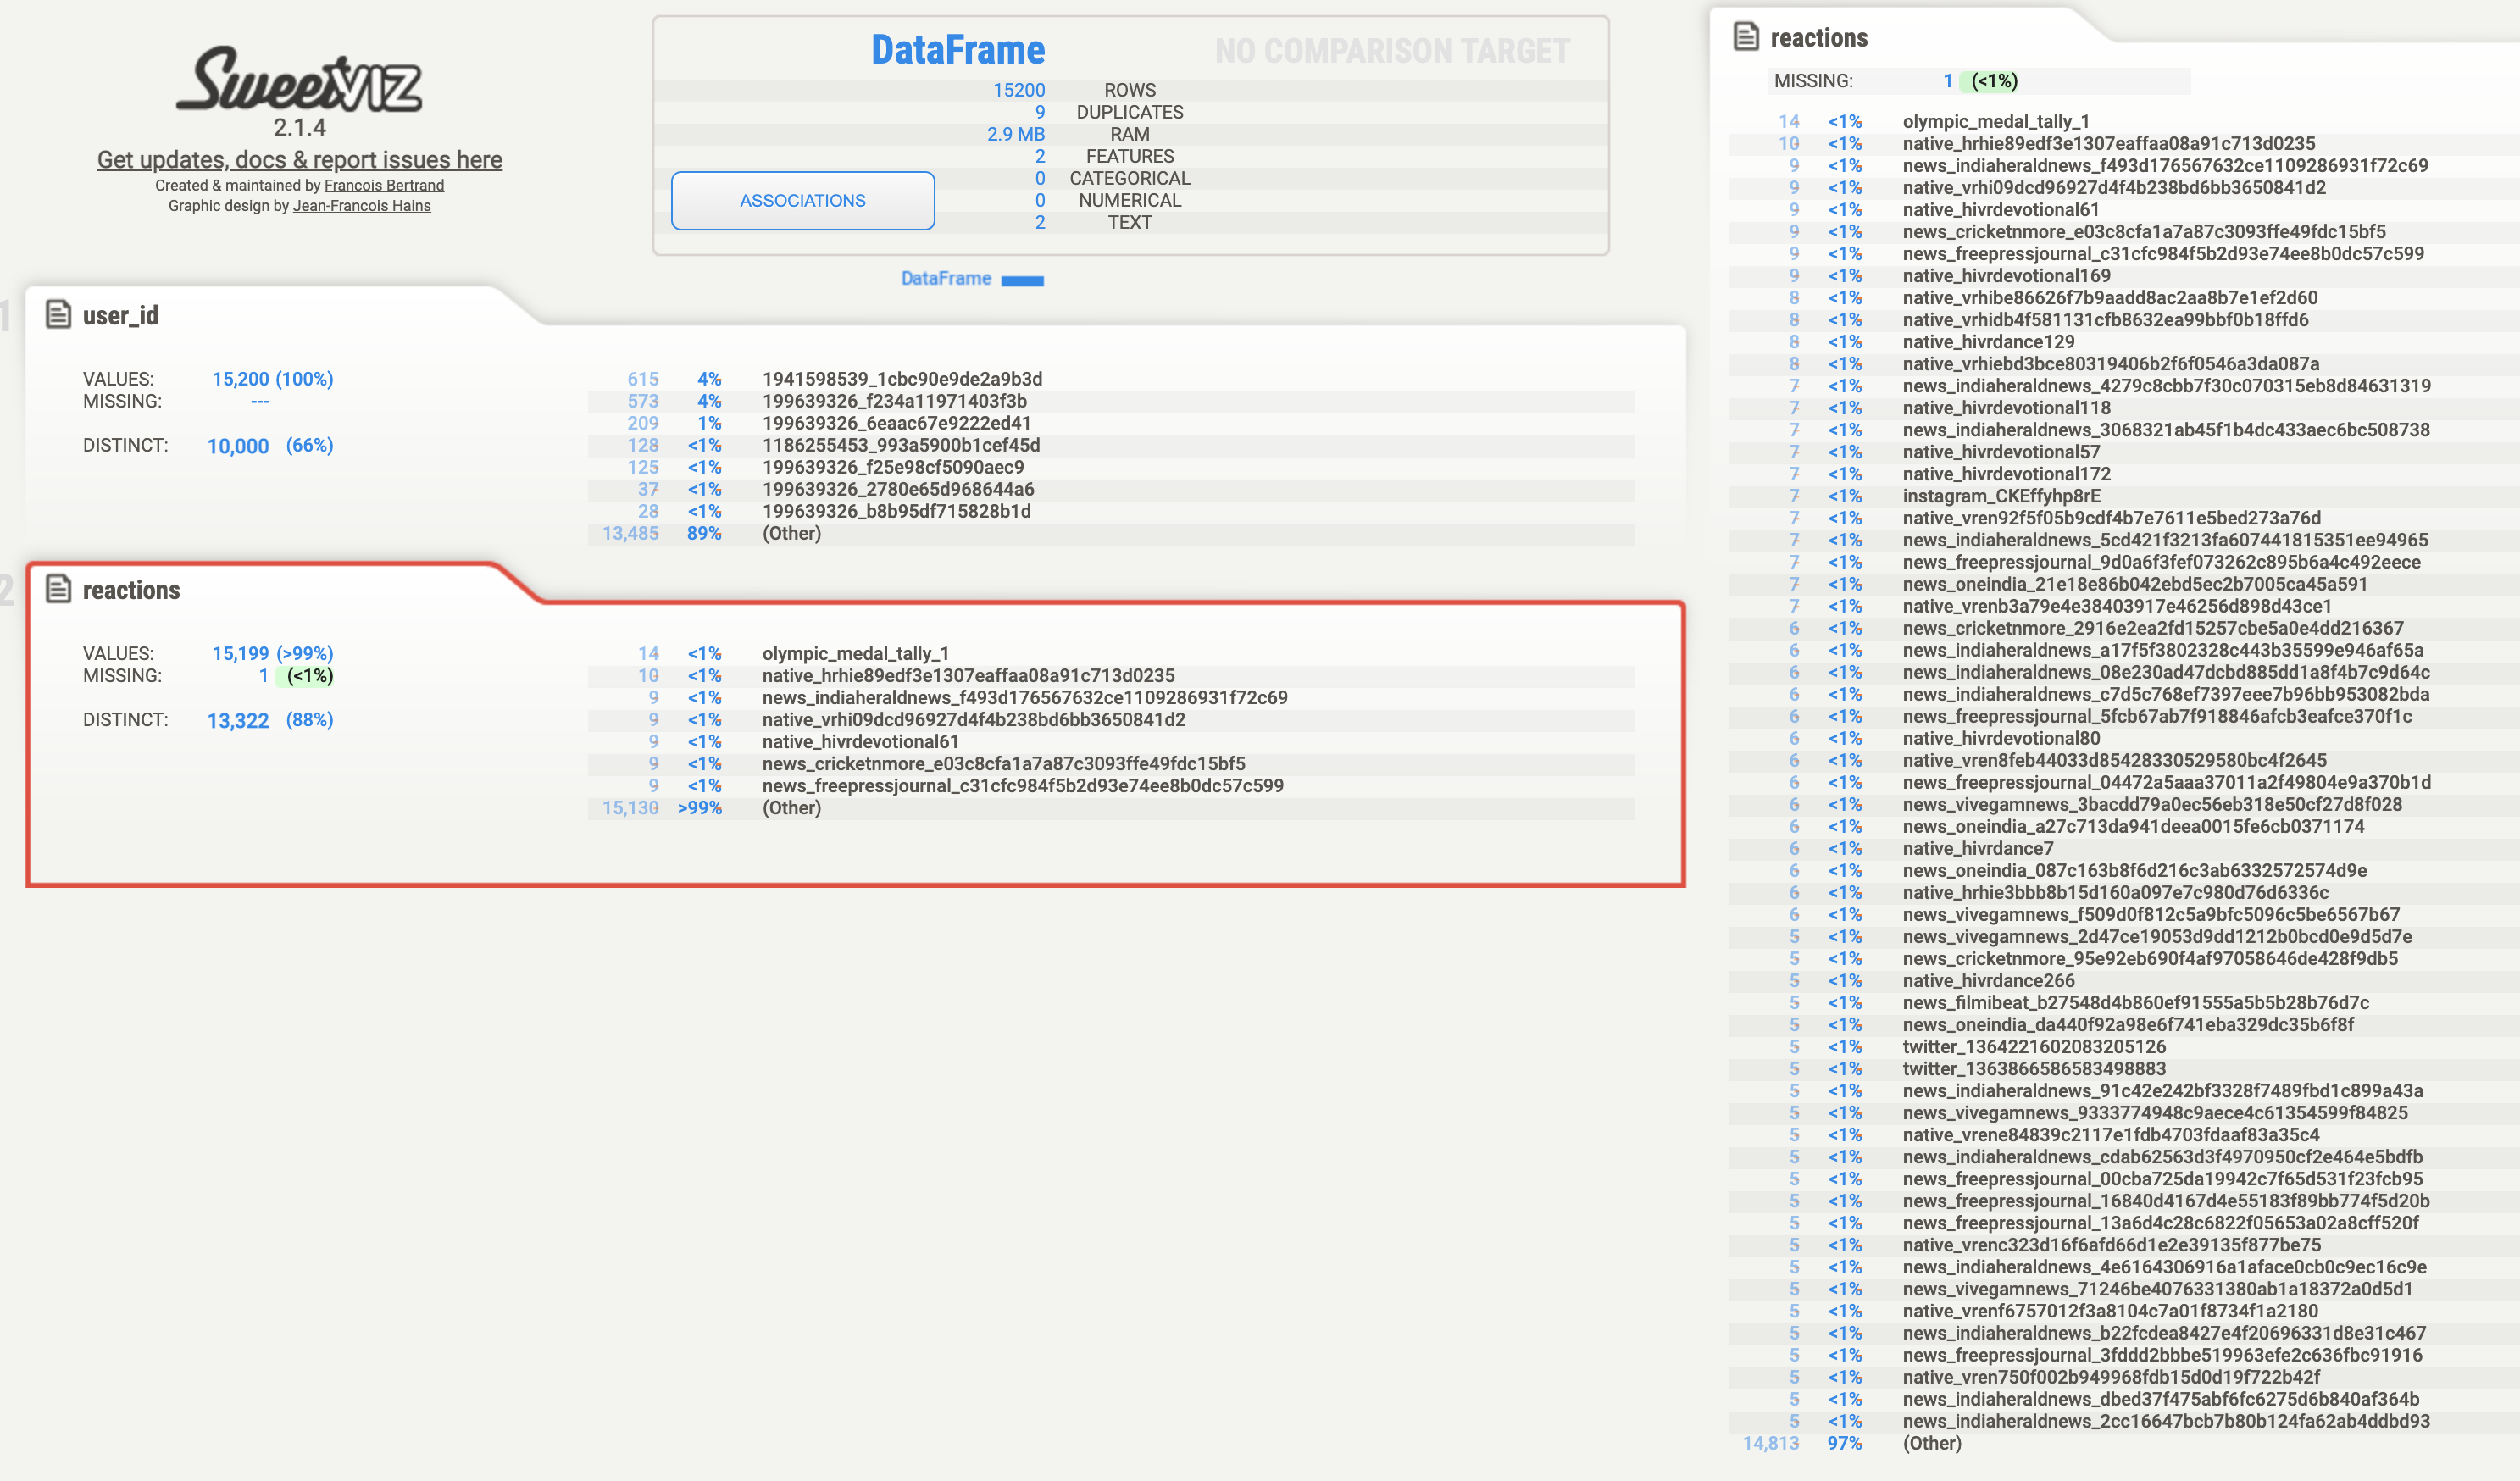

In [12]:
report = sv.analyze(data_expanded)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
data_expanded = data_expanded.dropna().reset_index(drop=True)
data_expanded

,user_id,reactions
0,199639326_479ce008ca8cf969,news_editorji_1650702128029
1,1186255453_6b96200b883f6581,native_vren8feb44033d85428330529580bc4f2645
2,864995365_f4e8b2e35b9d7ca5,news_chn_5808b5d60c232fb1334f645b5fc83fbb
3,864995365_f4e8b2e35b9d7ca5,twitter_1500002374227693569
4,199639326_0d726104e7e8bff1,news_dainikgomantak_2c7eda93dfc97fd8e776ee63c8...
...,...,...
15194,864995365_6c0516bf8ccc3bf5,news_filmibeat_f50cbf76ef4cf1f366981fbaabec65af
15195,864995365_6c0516bf8ccc3bf5,twitter_1363850965829386241
15196,1035438645_e08329519b0325cf,youtube_CTGL8qqjL7s
15197,864995365_8abe257b0eb3da4d,news_freepressjournal_64d7eeff2197999cbe761d6e...


In [19]:
data_expanded.groupby(['user_id','reactions']).size().sort_values(0,ascending=False).reset_index()


,user_id,reactions,0
0,174517858_73b5707b14ca8e8b,news_editorji_1648539271055,2
1,199639326_a1bc6ff764ce500f,news_hindifeeds-abplive_e8e549c230a9b3b2f4987e...,2
2,864995365_d56d189a59f8a3b5,news_kannadadunia_825e643b879aba26d81adc3fe7f6...,2
3,1035438645_cf44fc0f84d1ab2e,news_feeds-lifeberrys_f84070dd0ce9e3c2cc336942...,2
4,199639326_3c77e121fefa083c,news_marathifeed-tv9marathi_09dbe6c47d7935a117...,2
...,...,...,...
15185,2401714926_88d0afa4df87874a,news_freepressjournal_8a6e687d302872c41ee31e75...,1
15186,2401714926_8689b94f59bb0f1f,news_freepressjournal_3aba5518449dabfdd5aeb03b...,1
15187,2401714926_81f735ffc76b93d7,news_freepressjournal_5dc39664fa173e13ba5a0903...,1
15188,2401714926_803329ea44fa48fb,news_cricketnmore_6737d9ea63262f3731ba7bf8aeb1...,1


# Observations

Only one missing record in the entire data, thus dropped that record.
User-content frequency does not exceed 2